### **0. Set-up**

In [3]:
# Import libraries and utils
%run "utils.ipynb"

In [4]:
# Load predicted
raw_predicted = pd.read_csv("F:/work_study/ILLC/S3B1/LLM project/implementation/doubao/f9.csv")

# Load actual
raw_actual = pd.read_csv("F:/work_study/ILLC/S3B1/LLM project/implementation/f9_samples.csv")

In [5]:
# Show results
raw_predicted

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,开心,高兴,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
1,孩子气,傻,0.0,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,1.0,1.0
2,生病,疯,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,残忍,不公平,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,怪诞,奇怪,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,做,赚,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,赦免,原谅,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0
115,敬礼,演出,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116,拖着脚走,骑,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **1. Data Quality**

In [7]:
# Basic info
raw_predicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   word1                118 non-null    object 
 1   word2                118 non-null    object 
 2   similarity_score_1   118 non-null    float64
 3   similarity_score_2   118 non-null    float64
 4   similarity_score_3   118 non-null    float64
 5   similarity_score_4   118 non-null    float64
 6   similarity_score_5   118 non-null    float64
 7   similarity_score_6   118 non-null    float64
 8   similarity_score_7   118 non-null    float64
 9   similarity_score_8   118 non-null    float64
 10  similarity_score_9   118 non-null    float64
 11  similarity_score_10  118 non-null    float64
 12  similarity_score_11  118 non-null    float64
 13  similarity_score_12  118 non-null    float64
 14  similarity_score_13  118 non-null    float64
 15  similarity_score_14  118 non-null    flo

In [8]:
# Missing values per column
raw_predicted.isnull().sum()

word1                  0
word2                  0
similarity_score_1     0
similarity_score_2     0
similarity_score_3     0
similarity_score_4     0
similarity_score_5     0
similarity_score_6     0
similarity_score_7     0
similarity_score_8     0
similarity_score_9     0
similarity_score_10    0
similarity_score_11    0
similarity_score_12    0
similarity_score_13    0
similarity_score_14    0
similarity_score_15    0
dtype: int64

In [9]:
# Select word pairs and copy
wordpairs_predicted = raw_predicted[['word1', 'word2']].copy()
wordpairs_actual = raw_actual[['word1', 'word2']].copy()

# Remove whitespace
wordpairs_actual['word1'] = wordpairs_actual['word1'].replace(" ", "", regex=True)
wordpairs_actual['word2'] = wordpairs_actual['word2'].replace(" ", "", regex=True)

# Check if actual is identical to predicted
are_identical = wordpairs_actual.equals(wordpairs_predicted)
print("Word pairs in Actual are identical to Predicted:", are_identical)

# If not identical, show the differences
differences = None
if not are_identical:
    differences = wordpairs_actual.compare(wordpairs_predicted)
    differences.columns = ['Word1 Actual', 'Word1 Predicted', 'Word2 Actual', 'Word2 Predicted']

# Show results
differences if differences is not None else print("No differences found")

Word pairs in Actual are identical to Predicted: True
No differences found


### **2. Data Processing**

In [11]:
# Copy dataframe
predicted = raw_predicted.copy()

# List of columns to calculate mean MultiSimlex_CN
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean MultiSimlex_CN
predicted['pred_sl'] = predicted[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation MultiSimlex_CN
predicted['pred_sd'] = predicted[similarity_cols].std(axis=1).round(2)

# Select columns
predicted = predicted[['word1', 'word2', 'pred_sl', 'pred_sd']]

# Show results
predicted

,word1,word2,pred_sl,pred_sd
0,开心,高兴,6.00,0.00
1,孩子气,傻,0.93,0.88
2,生病,疯,0.00,0.00
3,残忍,不公平,0.00,0.00
4,怪诞,奇怪,4.53,0.52
...,...,...,...,...
113,做,赚,0.00,0.00
114,赦免,原谅,3.73,0.46
115,敬礼,演出,0.00,0.00
116,拖着脚走,骑,0.00,0.00


In [12]:
# Copy dataframe
actual = raw_actual.copy()

# List of columns to calculate prediction mean
annotation_cols = [f"Annotator {i}" for i in range(1, 11)]

# Calculate the prediction mean
actual['act_sl'] = actual['avg_anno']

# Calculate the prediction standard deviation
actual['act_sd'] = actual[annotation_cols].std(axis=1).round(2)

actual = actual[['word1', 'word2', 'act_sl', 'act_sd']]

# Show results
actual

,word1,word2,act_sl,act_sd
0,开心,高兴,5.55,0.53
1,孩子气,傻,2.91,1.33
2,生病,疯,0.91,2.00
3,残忍,不公平,0.45,0.67
4,怪诞,奇怪,4.64,1.08
...,...,...,...,...
113,做,赚,0.36,0.84
114,赦免,原谅,3.82,1.76
115,敬礼,演出,0.00,0.00
116,拖着脚走,骑,0.00,0.00


In [13]:
# Merge predicted and actual DataFrames
merged = pd.merge(predicted, actual, on=['word1', 'word2'])

# Show results
merged

,word1,word2,pred_sl,pred_sd,act_sl,act_sd
0,开心,高兴,6.00,0.00,5.55,0.53
1,孩子气,傻,0.93,0.88,2.91,1.33
2,生病,疯,0.00,0.00,0.91,2.00
3,残忍,不公平,0.00,0.00,0.45,0.67
4,怪诞,奇怪,4.53,0.52,4.64,1.08
...,...,...,...,...,...,...
113,做,赚,0.00,0.00,0.36,0.84
114,赦免,原谅,3.73,0.46,3.82,1.76
115,敬礼,演出,0.00,0.00,0.00,0.00
116,拖着脚走,骑,0.00,0.00,0.00,0.00


In [14]:
merged['pred_act_gap']=merged['pred_sl']-merged['act_sl']
merged_sorted = merged.sort_values(by="pred_act_gap", ascending = False)
merged_sorted.to_csv('f9_diff.csv')

### **3. Descriptive Statistics**

In [16]:
# Summary statistics MultiSimlex_CN
pred_sl_summary = round(predicted['pred_sl'].describe(), 2)
act_sl_summary = round(actual['act_sl'].describe(), 2)

# Add median MultiSimlex_CN
pred_sl_summary['median'] = round(predicted['pred_sl'].median(), 2)
act_sl_summary['median'] = round(actual['act_sl'].median(), 2)

# Summary statistics standard deviations
pred_sd_summary = round(predicted['pred_sd'].describe(), 2)
act_sd_summary = round(actual['act_sd'].describe(), 2)

# Add median standard deviation
pred_sd_summary['median'] = round(predicted['pred_sd'].median(), 2)
act_sd_summary['median'] = round(actual['act_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "pred_sl": pred_sl_summary,
    "act_sl": act_sl_summary,
    "pred_sd": pred_sd_summary,
    "act_sd": act_sd_summary
})

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,118.00,118.00,118.00,118.00
mean,1.57,1.59,0.12,0.93
std,1.94,1.65,0.27,0.58
min,0.00,0.00,0.00,0.00
25%,0.00,0.18,0.00,0.42
50%,0.14,0.73,0.00,0.97
75%,2.62,2.98,0.00,1.37
max,6.00,5.64,1.01,2.00
median,0.14,0.73,0.00,0.97


#### **3.1. MultiSimlex_CN**

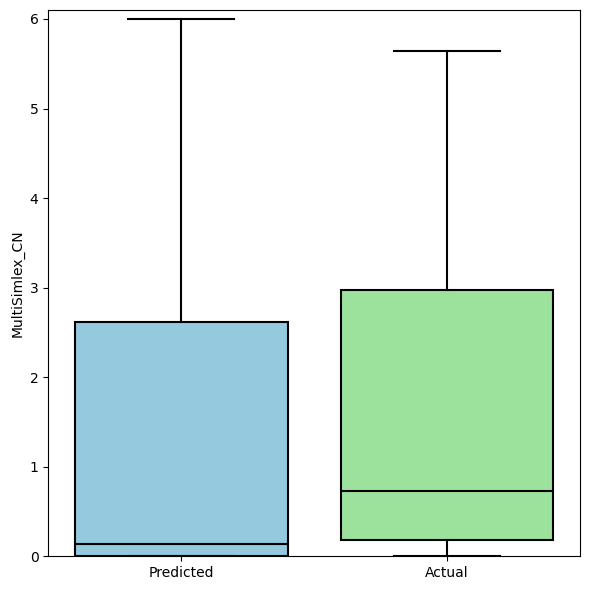

In [18]:
# Rename columns and copy
renamed_pred_sl = predicted.rename(columns={"pred_sl": "MultiSimlex_CN"}).copy()
renamed_act_sl = actual.rename(columns={"act_sl": "MultiSimlex_CN"}).copy()

# Create dummy label
renamed_pred_sl['Score'] = 'Predicted'
renamed_act_sl['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_pred_sl, renamed_act_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='MultiSimlex_CN',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('MultiSimlex_CN')
# plt.title('Comparison of MultiSimlex_CN')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 6.1)  # Setting y-axis limits from 0 to 6

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.savefig("f9sim.png")
# Show results
plt.show()

#### **3.2. Standard Deviation**

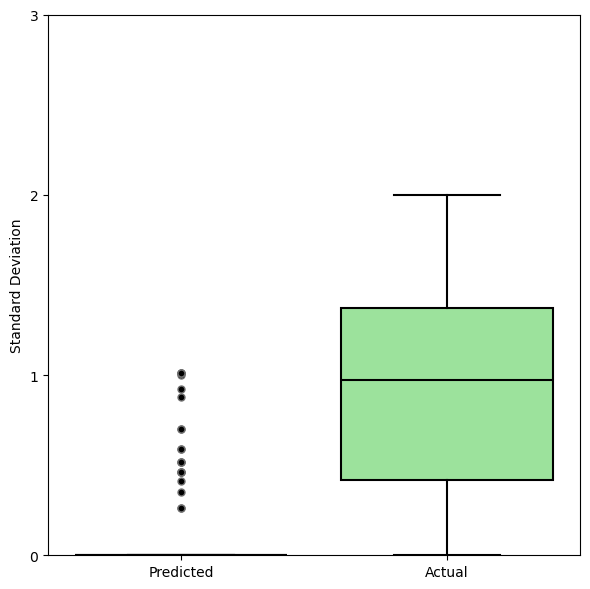

In [20]:
# Rename columns and copy
renamed_predicted_sd = predicted.rename(columns={"pred_sd": "Standard Deviation"}).copy()
renamed_actual_sd = actual.rename(columns={"act_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_predicted_sd['Score'] = 'Predicted'
renamed_actual_sd['Score'] = 'Actual'

# Combine DataFrames
combined_data = pd.concat([renamed_predicted_sd, renamed_actual_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 3)  # Setting y-axis limits from 0 to 3

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()
plt.savefig("f9sd.png")
# Show results
plt.show()

### **4. Distributions**

#### **4.1. SimLex-999**

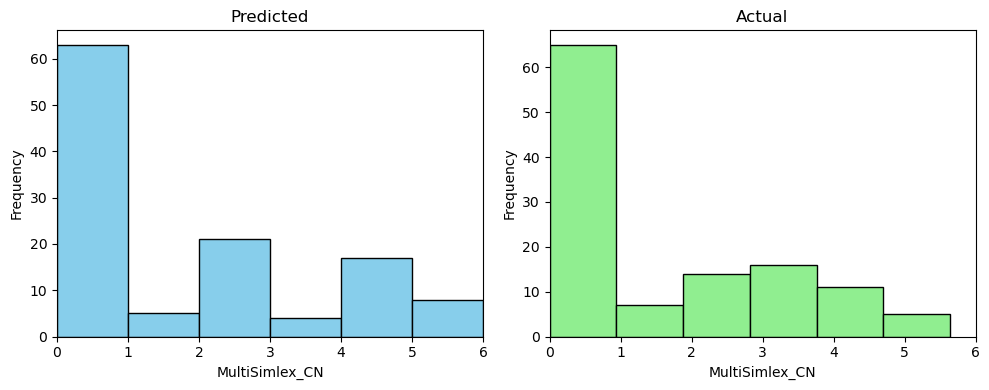

In [24]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 6

# Define bins
bins = 6

# Plot predicted histogram
axes[0].hist(renamed_pred_sl['MultiSimlex_CN'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('MultiSimlex_CN')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_act_sl['MultiSimlex_CN'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('MultiSimlex_CN')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **4.2. Standard Deviation**

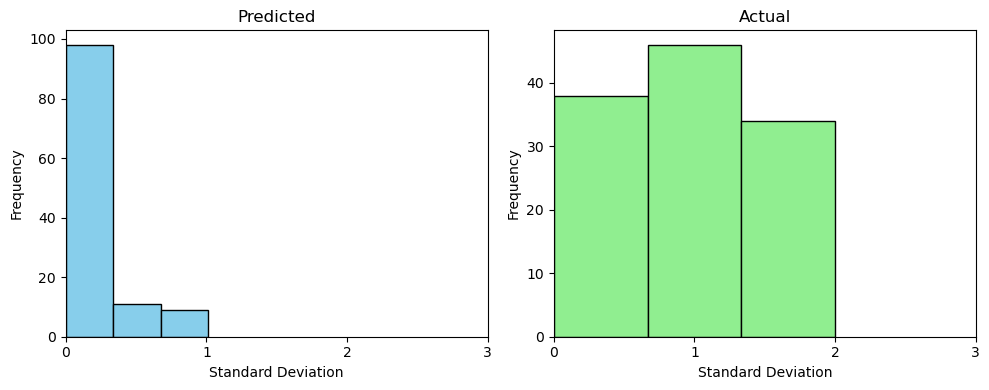

In [26]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 3

# Define bins
bins = 3

# Plot predicted histogram
axes[0].hist(renamed_predicted_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('Predicted')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot actual histogram
axes[1].hist(renamed_actual_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('Actual')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **5. Outliers**

#### **5.1. Predicted**

In [29]:
# Count outliers
print_outlier_counts(predicted)

Outliers in pred_sd: 22
No outliers found in columns: pred_sl


In [30]:
# Row outliers
print_outlier_data(predicted, 'pred_sd')


Outliers in pred_sd:
    word1  word2  pred_sl  pred_sd
1     孩子气      傻     0.93     0.88
4      怪诞     奇怪     4.53     0.52
14    无实体     心灵     2.27     0.59
19    紧张地    焦急地     4.80     0.41
31     衣服     布料     2.07     0.26
33      床     家俱     2.13     0.52
39     下面     侧面     1.47     0.92
43     男孩     孩子     3.87     0.52
68     骨头     牙齿     0.80     1.01
72     价值     价格     2.07     0.26
74      花     灌木     1.00     1.00
82   威士忌酒   杜松子酒     0.27     0.70
83     飞机  喷气式飞机     3.73     0.70
87     蜥蜴     鳄鱼     1.20     1.01
93     装作     似乎     1.20     1.01
94     戏弄     伤害     0.80     1.01
97     收藏     保存     4.27     0.46
98     收到     接受     3.73     0.46
99     生活     生存     2.13     0.35
109    搜索      看     1.73     0.46
114    赦免     原谅     3.73     0.46
117    混合     联合     2.73     0.59


#### **5.2. Actual**

In [32]:
# Count outliers
print_outlier_counts(actual)

No outliers found in columns: act_sl, act_sd


In [33]:
# Row outliers
print_outlier_data(actual, 'act_sd')

No outliers found in act_sd


#### **5.3. Add to Summary**

In [35]:
# Calculate outliers
outliers_pred_sl = calculate_outliers(predicted, 'pred_sl')
outliers_pred_sd = calculate_outliers(predicted, 'pred_sd')
outliers_act_sl = calculate_outliers(actual, 'act_sl')
outliers_act_sd = calculate_outliers(actual, 'act_sd')

# Count outliers
count_outliers_pred_sl = outliers_pred_sl.shape[0]
count_outliers_pred_sd = outliers_pred_sd.shape[0]
count_outliers_act_sl = outliers_act_sl.shape[0]
count_outliers_act_sd = outliers_act_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_pred_sl, count_outliers_act_sl, count_outliers_pred_sd, count_outliers_act_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,pred_sl,act_sl,pred_sd,act_sd
count,118.00,118.00,118.00,118.00
mean,1.57,1.59,0.12,0.93
std,1.94,1.65,0.27,0.58
min,0.00,0.00,0.00,0.00
25%,0.00,0.18,0.00,0.42
50%,0.14,0.73,0.00,0.97
75%,2.62,2.98,0.00,1.37
max,6.00,5.64,1.01,2.00
median,0.14,0.73,0.00,0.97
outliers,0.00,0.00,22.00,0.00


### **6. Correlation**

#### **6.1. SimLex-999 vs Standard Deviation**

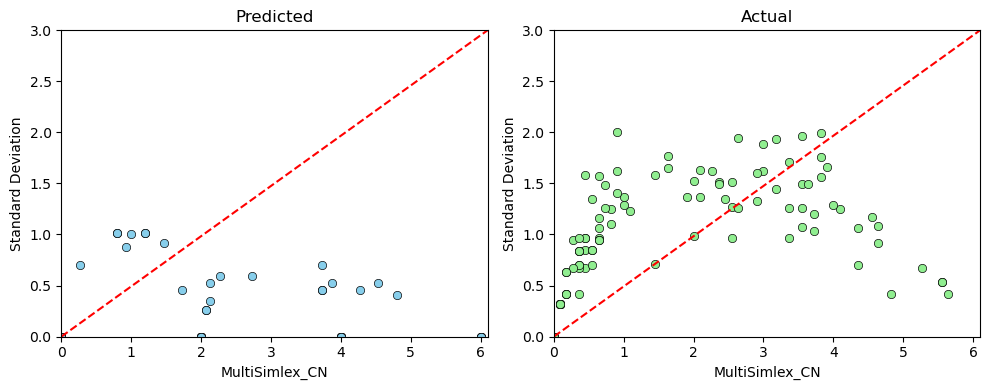

In [38]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 6.1
y_min = 0
y_max = 3.0

# Create scatter plot
sns.scatterplot(x='pred_sl', y='pred_sd', data=predicted, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('MultiSimlex_CN')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('Predicted')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='act_sl', y='act_sd', data=actual, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('MultiSimlex_CN')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('Actual')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [39]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(merged, 'pred_sl', 'pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(merged, 'act_sl', 'act_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,pred_sl,pred_sd,0.30845,6.783264e-04,significant
1,act_sl,act_sd,0.70538,4.783752e-19,significant


### **7. Evaluation Metrics**

#### **7.1. Spearmans's Rank Correlation**

##### **7.1.1. Actual SimLex-999 vs Predicted SimLex-999**

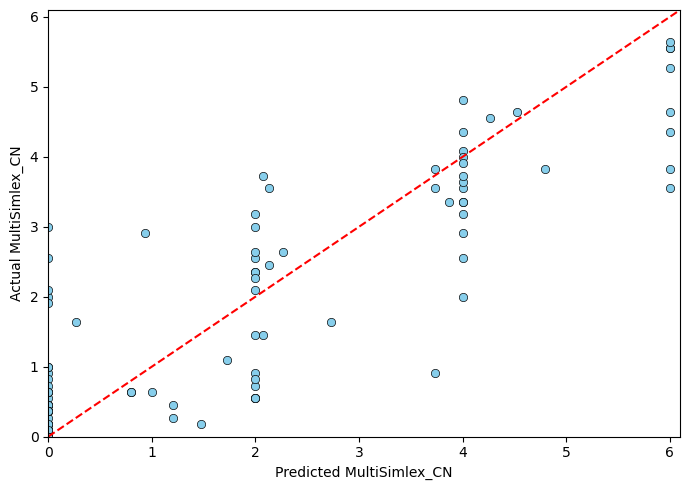

In [43]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sl', 'act_sl', 'Predicted MultiSimlex_CN', 'Actual MultiSimlex_CN', 0, 6.1, 0, 6.1)

In [44]:
# Correlation and pvalue
print_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Spearman's Rank correlation: 0.84098
P-value: 9.990671352545916e-33
The correlation is statistically significant.



In [45]:
print_tau_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Kendall’s Tau correlation: 0.71356
P-value: 1.5854019125019458e-24
The correlation is statistically significant.



In [46]:
print_distance_correlation_and_pvalue(merged, 'pred_sl', 'act_sl',random_state=42)

Distance Correlation: 0.84997
P-value: 0.000999000999000999
The correlation is statistically significant.



C:\Users\38155\AppData\Local\Temp\ipykernel_1548\692413257.py:19: DeprecationWarning: Attribute "p_value" deprecated, use "pvalue" instead.
  ).p_value


(0.8499707599728189, 0.000999000999000999)

In [47]:
print_pearson_correlation_and_pvalue(merged, 'pred_sl', 'act_sl')

Pearson's correlation: 0.87807
P-value: 6.214672510572104e-39
The correlation is statistically significant.



In [48]:
# Standard deviation
print("Mean standard deviation per individual word pair:", round(merged['pred_sd'].mean(), 2))

Mean standard deviation per individual word pair: 0.12


##### **7.1.2. Actual Standard Deviation vs Predicted Standard Deviation**

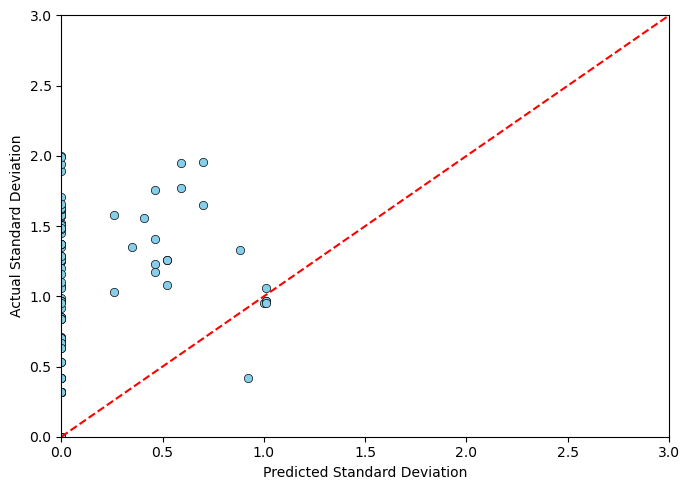

In [50]:
# Scatter plot
plot_scatter_plot(merged, 'pred_sd', 'act_sd', 'Predicted Standard Deviation', 'Actual Standard Deviation', 0, 3, 0, 3)

In [51]:
# Correlation and p-value
print_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Spearman's Rank correlation: 0.29278
P-value: 0.001293842074217086
The correlation is statistically significant.



In [52]:
print_tau_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Kendall’s Tau correlation: 0.23048
P-value: 0.0018488160375957996
The correlation is statistically significant.



In [53]:
print_distance_correlation_and_pvalue(merged, 'pred_sd', 'act_sd',random_state=42)

Distance Correlation: 0.29796
P-value: 0.002997002997002997
The correlation is statistically significant.



C:\Users\38155\AppData\Local\Temp\ipykernel_1548\692413257.py:19: DeprecationWarning: Attribute "p_value" deprecated, use "pvalue" instead.
  ).p_value


(0.2979626163861561, 0.002997002997002997)

In [54]:
print_pearson_correlation_and_pvalue(merged, 'pred_sd', 'act_sd')

Pearson's correlation: 0.23502
P-value: 0.010412777001794065
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [56]:
# Calculate Mean Squared Error
mse = mean_squared_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 0.86


#### **7.3. Mean Absolute Error (MAE)**

In [58]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(merged['pred_sl'], merged['act_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.64
